In [24]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
from scipy.integrate import trapz

In [36]:
width = 50
mfp = width / 5
sigma = 1 / mfp
nx = 100
nang = 2

In [37]:
leggauss(nang)

(array([-0.96028986, -0.79666648, -0.52553241, -0.18343464,  0.18343464,
         0.52553241,  0.79666648,  0.96028986]),
 array([0.10122854, 0.22238103, 0.31370665, 0.36268378, 0.36268378,
        0.31370665, 0.22238103, 0.10122854]))

In [38]:
t = np.linspace(-1, 1, 100000)

In [39]:
f = lambda x: 3 + x - 0.3 * x**2

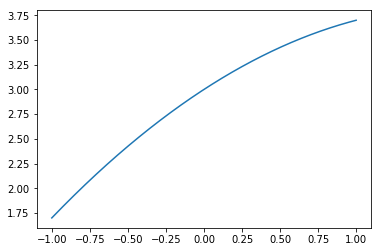

In [40]:
plt.plot(t, f(t))

In [41]:
%%timeit
trapz(f(t), t)

617 µs ± 60.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [42]:
mus, wts = leggauss(2)

In [43]:
%%timeit
wts.T @ f(mus)

7.37 µs ± 348 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
def step(fluxin, mu, s=0, sigma=sigma, width=width, nx=nx):
    dx = width / nx
    mux = mu / dx
    
    numerator = 

In [44]:
def diamond_difference(psi_in, mu, s=0, sigma=sigma, width=width, nx=nx):
    dx = width / nx
    mux = mu / dx
    hsig = sigma / 2
    
    psi_out = psi_in * (mux - hsig) / (mux + hsig)
    psi_avg = 0.5 * (psi_in + psi_out)
    
    return psi_avg, psi_out

In [45]:
left = np.zeros((nang, nx))
right = np.zeros((nang, nx))
avg = np.zeros((nang, nx))
left[:, 0] = np.ones_like(left[:, 0])

In [51]:
def scalar(avg, nang=nang):
    wts = leggauss(nang)[1]
    return (2 * nang + 1) * avg.T @ wts

In [52]:
scalar(left, nang)

array([34.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [53]:
mus

array([-0.93246951, -0.66120939, -0.23861919,  0.23861919,  0.66120939,
        0.93246951])

In [60]:
mus, wts = leggauss(nang)
for _ in range(100):
    for ia in range(nang):
        mu = mus[ia]
        for ix in range(nx):
            if ix == 0:
                l = 1.0
            else:
                l = left[ia, ix-1]

            a, r = diamond_difference(l, mu)

            avg[ia, ix] = a
            right[ia, ix] = r

In [61]:
avg

array([[1.02672968, 1.02672968, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [66]:
mus, wts = leggauss(2)

In [67]:
for mu, wt in zip(mus, wts):
    print(f"{mu} \t {wt}")

-0.5773502691896257 	 1.0
0.5773502691896257 	 1.0
